<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/02/PTE_DL2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 2. gyakorlat: tensorflow, regresszió, osztályozás, regularizáció
### 2022. szeptrember 14.

# PTE DL3 #


- **teljesen összekapcsolt** neurális hálózati architektúra létrehozása
- neurális hálók alkalmazása két klasszikus ML-problémára: **regresszió** és **osztályozás**.
- neurális hálók képzése **stochasztikus gradiens ereszkedéssel**, és
- a teljesítmény javítása **dropout**, **batch normalizáció** és más technikák segítségével


# Mi a mélytanulás? #

A mesterséges intelligencia terén az elmúlt évek leglenyűgözőbb előrelépései a *mély tanulás* területén történtek. A természetes nyelvi fordítás, a képfelismerés és a játék mind olyan feladatok, ahol a mély tanulási modellek megközelítették, vagy akár meg is haladták az emberi szintű teljesítményt.

Mi is az a mélytanulás? A **mély tanulás** a gépi tanulás olyan megközelítése, amelyet mély számítási hálózatok jellemeznek. Ez a számítási mélység teszi lehetővé, hogy a mélytanulási modellek a legnehezebb valós adathalmazokban található összetett és hierarchikus mintázatokat kibogozzák.

A **neurális hálózatok** teljesítményük és skálázhatóságuk révén a mélytanulás meghatározó modelljévé váltak.  A neurális hálózatok neuronokból állnak, ahol minden egyes neuron külön-külön csak egy egyszerű számítást végez. A neurális hálózatok ereje ehelyett a neuronok által kialakítható kapcsolatok összetettségéből ered.


# A neuron #

Kezdjük tehát a neurális hálózat alapvető összetevőjével: az egyes neuronokkal. Egy **neuron** (vagy **egység**) egy bemenettel így néz ki:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/mfOlDR6.png" width="250" alt="Egy lineáris egység diagramja.">
<figcaption style="textalign: center; font-style: italic"><center>A lineáris egység: $y = w x + b$.
</center></figcaption>
</figura>

A bemenet az `x`. A neuronhoz való kapcsolódásának **súlya** van, ami `w`. Valahányszor egy érték átfolyik egy kapcsolaton, megszorozzuk az értéket a kapcsolat súlyával. Az `x` bemenet esetén, ami a neuronhoz eljut, az `w * x`. A neurális hálózat a súlyok módosításával "tanul".

A `b` a súly egy speciális fajtája, amelyet **biasnak** nevezünk. Az előfeszítéshez nem kapcsolódik semmilyen bemeneti adat; helyette egy `1`-et teszünk a diagramba, így a neuronhoz érkező érték csak `b` (mivel `1 * b = b`). Az előfeszítés lehetővé teszi a neuron számára, hogy a bemenetektől függetlenül módosítsa a kimenetet.

Az `y` az az érték, amelyet a neuron végül kiad. A kimenethez a neuron a kapcsolatain keresztül kapott értékeket összegzi. Ennek a neuronnak az aktivációja `y = w * x + b`, vagy a képletben $y = w x + b$.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Az $y=w x + b$ képlet ismerős?</strong><br>
Ez egy egyenes egyenlete! Ez a meredekség-metszéspont egyenlet, ahol $w$ a meredekség és $b$ az y-metszés. 
</blockquote>

# Példa - A lineáris egység mint modell #

Bár az egyes neuronok általában csak egy nagyobb hálózat részeként működnek, gyakran hasznos, ha alapként egyetlen neuron modelljével kezdünk. Az egy neuronból álló modellek *lineáris* modellek. 

Gondoljuk végig, hogyan működhet ez egy olyan adathalmazon, mint a [80 Gabona](https://www.kaggle.com/crawford/80-cereals). Ha egy modellt képezünk ki a `'cukrok'-kal (gramm cukor adagonként) mint bemenet és a `'kalóriák'-kal (kalória adagonként) mint kimenet, akkor a torzítás `b=90`, a súly pedig `w=2.5`. Egy adagonként 5 gramm cukrot tartalmazó gabonapehely kalóriatartalmát így becsülhetjük meg:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/yjsfFvY.png" width="1000" alt="Számítás a lineáris egységgel.">
<figcaption style="textalign: center; font-style: italic"><center>Kiszámítás a lineáris egységgel.
</center></figcaption>
</figura>

És a képletünkkel összevetve azt kapjuk, hogy $kalória = 2,5 * 5 + 90 = 102,5$, ahogyan azt vártuk.

# Többszörös bemenet #

A *80 Cereals* adathalmaz sokkal több jellemzőt tartalmaz, mint csak a `'cukrok'`. Mi lenne, ha a modellünket ki akarnánk bővíteni olyan dolgokkal, mint a rost- vagy fehérjetartalom? Ez elég egyszerű. Csak több bemeneti kapcsolatot adunk a neuronhoz, egyet-egyet minden további jellemzőhöz. A kimenet megtalálásához minden bemenetet megszoroznánk a kapcsolati súlyával, majd összeadnánk őket.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/vyXSnlZ.png" width="300" alt="Három bemeneti kapcsolat: x0, x1 és x2, valamint az előfeszítés.">
<figcaption style="textalign: center; font-style: italic"><center>Egy lineáris egység három bemenettel.
</center></figcaption>
</figura>

Ennek a neuronnak a képlete a következő lenne: $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$. Egy lineáris egység két bemenettel egy síkba illeszkedik, egy ennél több bemenettel rendelkező egység pedig egy hipersíkba.

# Lineáris egységek a Kerasban #

A Kerasban a legegyszerűbben a `keras.Sequential` segítségével hozhatunk létre egy modellt, amely egy neurális hálózatot *rétegek halmazaként* hoz létre. A fentihez hasonló modelleket egy *sűrű réteggel* hozhatunk létre (amiről a következőkben többet fogunk megtudni).

Definiálhatunk egy lineáris modellt, amely három bemeneti jellemzőt fogad el (`'cukor'`, `'rost'` és `'fehérje'`), és egyetlen kimenetet (`'kalória'`) állít elő a következőképpen:




In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

Az első argumentummal, az `units`, meghatározzuk, hogy hány kimenetet szeretnénk. Ebben az esetben mi csak a `'kalóriákat'` jelezzük előre, ezért az `units=1` értéket használjuk. 

A második argumentummal, az `input_shape`-vel megmondjuk a Kerasnak a bemenetek méreteit. Az `input_shape=[3]` beállítása biztosítja, hogy a modell három jellemzőt fogadjon el bemenetként (`'cukor'`, `'rost'` és `'fehérje'`).

Ez a modell most már készen áll a gyakorló adatokra való illesztésre!

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Miért van a <code>input_shape</code> egy Python lista?</strong><br>
Az adatok, amelyeket ebben a kurzusban használni fogunk, általában táblázatos adatok lesznek, mint egy Pandas adatkeretben. Az adathalmaz minden egyes jellemzőjéhez lesz egy bemenetünk. A jellemzők oszlopok szerint vannak elrendezve, így mindig <code>input_shape=[num_columns]</code> lesz.

A Keras azért használ itt listát, hogy lehetővé tegye az összetettebb adathalmazok használatát. A képadatoknak például három dimenzióra lehet szükségük: <code>[magasság, szélesség, csatornák]</code>.
</blockquote>




# Neurális hálózat 

Ebben a leckében azt fogjuk megnézni, hogyan tudunk olyan neurális hálózatokat építeni, amelyek képesek megtanulni az összetett típusú kapcsolatokat, amelyekről a mély neurális hálók híresek.

A kulcsgondolat itt a *modularitás*, vagyis egy komplex hálózat felépítése egyszerűbb funkcionális egységekből. Láttuk, hogy egy lineáris egység hogyan számol ki egy lineáris függvényt -- most megnézzük, hogyan kombinálhatjuk és módosíthatjuk ezeket az egyes egységeket, hogy összetettebb kapcsolatokat modellezzünk.

# Rétegek #

A neurális hálózatok jellemzően **rétegekbe** szervezik neuronjaikat. Ha olyan lineáris egységeket gyűjtünk össze, amelyeknek közös bemenetük van, akkor egy **sűrű** réteget kapunk.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/2MA4iMV.png" width="300" alt="Három körből álló halom egy bemeneti rétegben, amely egy sűrű rétegben lévő két körhöz kapcsolódik.">
<figcaption style="textalign: center; font-style: italic"><center>Két lineáris egységből álló sűrű réteg, amely két bemenetet és egy torzítást kap.
</center></figcaption>
</figura>

Úgy is elképzelhetjük, hogy a neurális hálózat minden rétege valamilyen viszonylag egyszerű transzformációt hajt végre. A rétegek mély halmazán keresztül a neurális hálózat egyre összetettebb módon tudja átalakítani a bemeneteit. Egy jól képzett neurális hálózatban minden egyes réteg egy olyan átalakítás, amely egy kicsit közelebb visz minket a megoldáshoz.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Sokféle réteg</strong><br>
A "réteg" a Kerasban egy nagyon általános jellegű dolog. Egy réteg lehet lényegében bármilyen <em>adattranszformáció</em>. Sok réteg, mint például a <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D">konvolúciós</a> és <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN">recurrent</a> rétegek, neuronok felhasználásával alakítják át az adatokat, és elsősorban a kialakított kapcsolatok mintázatában különböznek. Másokat azonban <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding">új jellemzők kinyerésére</a> vagy csak <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">egyszerű számtani</a> feladatokra használnak. A rétegek egész világát fedezhetjük fel -- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">nézd meg őket</a>!
</blockquote>

# Az aktiválási függvény #

Kiderül azonban, hogy két sűrű réteg, amelyek között nincs semmi, semmivel sem jobb, mint egyetlen sűrű réteg önmagában. A sűrű rétegek önmagukban soha nem tudnak kimozdítani minket a vonalak és síkok világából. Amire szükségünk van, az valami *nemlineáris*. Aktiválási függvényekre van szükségünk.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/OLSUEYT.png" width="400" alt="">
<figcaption style="textalign: center; font-style: italic"><center>Az aktivációs függvények nélkül a neurális hálózatok csak lineáris összefüggéseket tudnak megtanulni. Ahhoz, hogy görbéket illesszünk, aktiválási függvényeket kell használnunk. 
</center></figcaption>
</figura>

Az **aktiválási függvény** egyszerűen valamilyen függvény, amelyet egy réteg minden egyes kimenetére (annak *aktivációira*) alkalmazunk. A legelterjedtebb az *egyenirányító* függvény $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/aeIyAlF.png" width="400" alt="Az egyenirányító függvény grafikonja. Az egyenes y=x, ha x>0, és y=0, ha x<0, ami egy "csuklós" alakot eredményez, mint a "_/"."> >.
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figura>

Az egyenirányító függvény grafikonja egy egyenes, amelynek negatív része nullára "egyenirányított". A függvényt egy neuron kimeneteire alkalmazva egy *görbületet* tesz az adatokba, eltávolodva az egyszerű vonalaktól.

Ha az egyenirányítót egy lineáris egységhez kapcsoljuk, akkor egy **egyenirányított lineáris egységet** vagy **ReLU-t** kapunk. (Ezért szokás az egyenirányító függvényt "ReLU függvénynek" nevezni).  A ReLU-aktiválás lineáris egységre való alkalmazása azt jelenti, hogy a kimenet `max(0, w * x + b)` lesz, amit egy ilyen diagramon rajzolhatunk meg:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eFry7Yu.png" width="250" alt="Egyetlen ReLU diagramja. Mint egy lineáris egység, de a '+' szimbólum helyett most egy csuklós '_/' van. ">
<figcaption style="textalign: center; font-style: italic"><center>Egy egyenirányított lineáris egység.
</center></figcaption>
</figura>

A kurzus késöbbi részében további aktivációs fügvényekkel is meg fogunk ismerkedni. (szigmoid, tanh, ...)



# Sűrű rétegek halmozása 

Most, hogy már van némi nemlinearitásunk, nézzük meg, hogyan tudunk rétegeket egymásra helyezni, hogy összetett adattranszformációkat kapjunk.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/Y5iwFQZ.png" width="450" alt="Egy bemeneti réteg, két rejtett réteg és egy végső lineáris réteg.">
<figcaption style="textalign: center; font-style: italic"><center>A sűrű rétegek halmaza egy "teljesen összekapcsolt" hálózatot alkot.
</center></figcaption>
</figura>

A kimeneti réteg előtti rétegeket néha **rejtettnek** nevezik, mivel kimeneteiket soha nem látjuk közvetlenül.

Most figyeljük meg, hogy az utolsó (kimeneti) réteg egy lineáris egység (vagyis nincs aktiváló függvény). Ez teszi ezt a hálózatot alkalmassá egy regressziós feladatra, ahol valamilyen tetszőleges számértéket próbálunk megjósolni. Más feladatok (mint például az osztályozás) aktiválási függvényt igényelhetnek a kimeneten.

## Szekvenciális modellek építése ##

Az általunk használt `Sorozatos` modell a rétegek listáját az elsőtől az utolsóig terjedő sorrendben kapcsolja össze: az első réteg kapja a bemenetet, az utolsó réteg pedig a kimenetet. Így jön létre a fenti ábrán látható modell:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

# rétegenként is fel lehet építeni a model.add(layers.Dense(units=3, activation='relu')) segítségével

# Bevezetés 


Mint minden gépi tanulási feladatnál, itt is egy sor képzési adattal kezdünk. A képzési adatok minden egyes példája néhány jellemzőből (a bemenetekből) és egy várható célértékből (a kimenetből) áll. A hálózat képzése azt jelenti, hogy a súlyokat úgy állítjuk be, hogy a hálózat a jellemzőket a célértékké tudja alakítani. A *80 gabonaféle* adathalmazban például olyan hálózatot szeretnénk, amely képes az egyes gabonafélék "cukor"-, "rost"- és "fehérjetartalmát" figyelembe venni, és előrejelzést készíteni az adott gabonaféle "kalóriatartalmára". Ha sikeresen be tudunk képezni egy hálózatot erre a feladatra, akkor a súlyainak valamilyen módon reprezentálniuk kell az említett jellemzők és a képzési adatokban kifejezett cél közötti kapcsolatot.

A képzési adatokon kívül még két dologra van szükségünk:
- Egy "veszteségfüggvényre", amely azt méri, hogy mennyire jók a hálózat előrejelzései.
- Egy "optimalizáló", amely megmondja a hálózatnak, hogyan változtassa meg a súlyokat.

# A veszteségfüggvény 

Láttuk, hogyan tervezzük meg egy hálózat architektúráját, de azt még nem láttuk, hogyan mondjuk meg a hálózatnak, hogy *milyen* problémát oldjon meg. Ez a veszteségfüggvény feladata.

A **veszteségfüggvény** a cél valódi értéke és a modell által megjósolt érték közötti eltérést méri. 

A különböző problémák különböző veszteségfüggvényeket igényelnek. Olyan **regressziós** problémákat vizsgáltunk, ahol a feladat valamilyen numerikus érték előrejelzése -- kalória a *80 gabonafélében*, minősítés a *Vörösbor minőségében*. Más regressziós feladatok lehetnek egy ház árának vagy egy autó üzemanyag-hatékonyságának előrejelzése.

A regressziós problémák gyakori veszteségfüggvénye a **abszolút hiba átlaga** vagy **MAE**. Az MAE minden egyes `y_pred` előrejelzés esetében az `y_true` abszolút különbséggel `abs(y_true - y_pred)` méri az eltérést a valódi céltól.

A teljes MAE veszteség egy adathalmazon az összes abszolút különbség átlaga.



<figure style="padding: 1em;">
<img src="https://i.imgur.com/VDcvkZN.png" width="500" alt="Az adatpontoktól a illesztett egyeneshez tartozó hibasávokat ábrázoló grafikon..">
<figcaption style="textalign: center; font-style: italic"><center>A középső abszolút hiba az illesztett görbe és az adatpontok közötti átlagos hossz.
</center></figcaption>
</figura>

A MAE mellett más veszteségfüggvények, amelyekkel regressziós problémák esetén találkozhatunk, az átlagos négyzetes hiba (MSE) vagy a Huber-veszteség (mindkettő elérhető a Kerasban).

A modell a képzés során a veszteségfüggvényt használja útmutatásként a súlyok helyes értékeinek megtalálásához (az alacsonyabb veszteség jobb). Más szóval a veszteségfüggvény megmondja a hálózatnak a célját.

# Az optimalizáló - sztochasztikus gradiens leszállás 

Leírtuk a problémát, amelyet a hálózattal meg akarunk oldani, de most meg kell mondanunk, hogy *hogyan* oldja meg. Ez az **optimalizáló** feladata. Az optimalizáló egy algoritmus, amely úgy állítja be a súlyokat, hogy minimalizálja a veszteséget.

A mélytanulásban használt optimalizáló algoritmusok gyakorlatilag mindegyike a **stochasztikus gradiens ereszkedés** nevű családba tartozik. Ezek iteratív algoritmusok, amelyek lépésekben képzik a hálózatot. A képzés egy **lépése** a következőképpen zajlik:
1. Mintavételezzünk néhány képzési adatot, és futtassuk le a hálózaton keresztül, hogy előrejelzéseket készítsünk.
2. Mérjük meg a veszteséget a jóslatok és a valós értékek között.
3. Végül állítsa be a súlyokat olyan irányba, hogy a veszteség kisebb legyen.

Ezután csak tegye ezt újra és újra, amíg a veszteség olyan kicsi nem lesz, amennyire szeretné (vagy amíg nem csökken tovább).

<figure style="padding: 1em;">
<img src="https://i.imgur.com/rFI1tIk.gif" width="1600" alt="Egy sor tételenkénti illesztése. A veszteség csökken, és a súlyok közelítenek a valós értékükhöz.">
<figcaption style="textalign: center; font-style: italic"><center>Neurális hálózat képzése sztochasztikus gradiens leszállással.
</center></figcaption>
</figura>

Az egyes iterációk képzési adatainak mintáját **minibatchnek** (vagy gyakran csak "batch"-nek), míg a képzési adatok egy teljes körét **epochnak** korszaknak nevezzük. A korszakok száma, amennyit edzünk, azt jelenti, hogy a hálózat hányszor látja az egyes edzési példákat.

Az animáció az első rész lineáris modelljének SGD-vel történő betanítását mutatja. A halványpiros pontok a teljes tréningkészletet ábrázolják, míg az egyszínű piros pontok a minitételeket. Minden alkalommal, amikor az SGD egy új minitételt lát, a súlyokat (`w` a meredekséget és `b` az y-metszetet) a helyes értékek felé tolja el az adott tételen. Tételről tételre a vonal végül konvergál a legjobb illeszkedéshez. Látható, hogy a veszteség egyre kisebb lesz, ahogy a súlyok közelebb kerülnek a valódi értékekhez.



## Tanulási sebesség és tételméret 

Vegyük észre, hogy a vonal csak egy kis elmozdulást tesz az egyes tételek irányában (ahelyett, hogy teljesen elmozdulna). Ezeknek az eltolódásoknak a méretét a **tanulási sebesség** határozza meg. Egy kisebb tanulási ráta azt jelenti, hogy a hálózatnak több minitételt kell látnia, mielőtt a súlyai a legjobb értékükhöz konvergálnak.

A tanulási ráta és a minitételek mérete az a két paraméter, amely a legnagyobb hatással van az SGD képzés menetére. Ezek kölcsönhatása gyakran finom, és e paraméterek helyes megválasztása nem mindig nyilvánvaló. (Ezeket a hatásokat a gyakorlatban fogjuk megvizsgálni.)

Szerencsére a legtöbb munka esetében nem lesz szükség kiterjedt hiperparaméter-keresésre ahhoz, hogy kielégítő eredményeket kapjunk. Az **Adam** egy olyan SGD algoritmus, amely adaptív tanulási sebességgel rendelkezik, ami a legtöbb problémára alkalmassá teszi a paraméterek hangolása nélkül (bizonyos értelemben "önhangoló"). Az Adam egy nagyszerű általános célú optimalizáló.

## A veszteség és az optimalizáló hozzáadása 

A modell definiálása után a modell `compile` módszerével hozzáadhat egy veszteségfüggvényt és egy optimalizálót:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

Vegyük észre, hogy a veszteséget és az optimalizálót csak egy karakterlánccal tudjuk megadni. Ezekhez közvetlenül is hozzáférhetünk a Keras API-n keresztül -- ha például paramétereket szeretnénk hangolni --, de nekünk az alapértelmezettek is megfelelnek.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">".
    <strong>Mi van a névben?</strong><br>
A <strong>gradiens</strong> egy vektor, amely megmondja, hogy a súlyoknak milyen irányba kell menniük. Pontosabban azt mondja meg, hogyan kell megváltoztatni a súlyokat, hogy a veszteség <em>gyorsabban</em> változzon. A folyamatunkat gradiensnek <strong>lejtmenetnek</strong> nevezzük, mert a gradienst arra használja, hogy <em>lejtmenet</em> a veszteséggörbét egy minimum felé vezesse. <strong>Sztochasztikus</strong> azt jelenti, hogy "véletlen által meghatározott". A képzésünk <em>stochasztikus</em>, mert a minitételek <em>véletlen minták</em> az adathalmazból. És ezért hívják SGD-nek!
</blockquote>



# Példa - vörösbor minősége 

Most már mindent tudunk, amire szükségünk van ahhoz, hogy elkezdhessük a mélytanulási modellek képzését. Lássuk tehát a gyakorlatban! A *Red Wine Quality* adathalmazt fogjuk használni.

Ez az adatkészlet körülbelül 1600 portugál vörösbor fiziokémiai méréseiből áll. Tartalmazza továbbá az egyes borok vak kóstolótesztekből származó minőségi értékelését is. Mennyire tudjuk megjósolni egy bor érzékelt minőségét ezekből a mérésekből?



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

red_wine = pd.read_csv('red-wine.csv')

y = red_wine.quality #X,y beállítása
X = red_wine.drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # első felosztás train, teszt halmazokra

# Scale to [0, 1]
max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)
X_train = (X_train - min_) / (max_ - min_)
X_test = (X_test - min_) / (max_ - min_)

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Hány bemenettel kell rendelkeznie ennek a hálózatnak? Ezt az adatmátrix oszlopainak számával tudjuk kideríteni. Ügyeljünk arra, hogy a célt (`'minőség'`) itt ne szerepeltessük -- csak a bemeneti jellemzőket.

In [ ]:
X_train.shape

(1279, 11)

Tizenegy oszlop tizenegy bemenetet jelent.

Egy háromrétegű hálózatot választottunk, több mint 1500 neuronnal. Ennek a hálózatnak képesnek kell lennie arra, hogy meglehetősen összetett összefüggéseket tanuljon az adatokban.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

A modell architektúrájának eldöntése egy folyamat része kell, hogy legyen. Kezdje egyszerűen, és használja a validációs veszteséget útmutatóként. A modellfejlesztésről a gyakorlatokban többet fog megtudni.

A modell meghatározása után az optimalizálót és a veszteségfüggvényt állítjuk össze.

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
    )

Most már készen állunk a képzés megkezdésére! Megmondtuk a Kerasnak, hogy egyszerre 256 sort tápláljon az optimalizálónak a képzési adatokból (a `batch_size`), és ezt 10 alkalommal tegye végig az adathalmazon (az `epochs`).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
)

Epoch 1/100
5/5 [==============================] - 1s 38ms/step - loss: 4.9562 - val_loss: 3.4007
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 1.9434 - val_loss: 2.0638
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.4480 - val_loss: 0.9232
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 1.1843 - val_loss: 0.8773
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8705 - val_loss: 0.9443
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8237 - val_loss: 0.7587
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.7999 - val_loss: 0.6280
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.7374 - val_loss: 0.6186
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6857 - val_loss: 0.6142
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6591 - val_loss: 0.6155
Epoch 11/100
5/5 [==========

Láthatja, hogy a Keras folyamatosan tájékoztatja Önt a veszteségről, ahogy a modell tanul.

Gyakran azonban jobb módja a veszteség megtekintésének, ha ábrázolja azt. A `fit` módszer valójában egy `History` objektumban tartja nyilván a képzés során keletkezett veszteséget. Az adatokat egy Pandas adatkeretbe konvertáljuk, ami megkönnyíti a grafikus ábrázolást.

##Mit jelentenek a loss-ok?

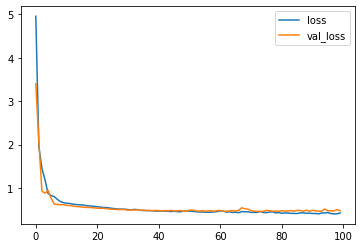

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Figyeljük meg, hogy a veszteség a korszakok elteltével kiegyenlítődik. Amikor a veszteséggörbe ilyen vízszintessé válik, az azt jelenti, hogy a modell mindent megtanult, amit csak tudott, és nincs értelme további korszakokat folytatni.

#Osztályozási feladat

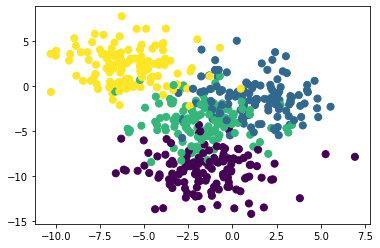

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(500, 2, centers = 4, random_state=2, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

#Vizsgáljuk meg X-et és y-t


In [ ]:
print(X[:10])
print(y[:10])

[[ -0.17719387  -4.89705934]
 [ -6.49984446   3.55613952]
 [ -4.37345118 -13.64677923]
 [ -2.2818913   -7.39746205]
 [ -3.7159428   -0.02291661]
 [ -3.53530837  -1.41299822]
 [  0.58507297  -0.72268008]
 [  0.97804728  -3.16121347]
 [ -1.11658179  -3.65906656]
 [ -2.05426997  -1.61505894]]
[0 3 0 2 3 2 2 1 1 2]


#Osszuk fel az adatokat tréning és teszt részekre, az y-t alakítsuk át one hot encoding segítségével

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(...... # első felosztás train, teszt halmazokra

y_train = tf.keras.utils.to_categorical( , )
y_test = tf.keras.utils.to_categorical(, )

In [ ]:
y_train[:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

#Készítsük el az architekturát 3 rejtett réteggel rétegenként 64 neuronnal
Figyeljünk a bemeneti/kimeneti dimenzióra, aktivitásokra!


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(    ,
    ,
])

#Compile segítségével adjuk meg az optimalizálót, loss-t, metrikát
Figyelem osztályozási feladat!

In [ ]:
model.compile(
    optimizer='adam',
    loss='cat.........,
    metrics=['accuracy'])
  

#Illesszük a modellt

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=200,
)

Epoch 1/200
2/2 [==============================] - 1s 382ms/step - loss: 1.3618 - accuracy: 0.2425 - val_loss: 1.1958 - val_accuracy: 0.5200
Epoch 2/200
2/2 [==============================] - 0s 42ms/step - loss: 1.1834 - accuracy: 0.4850 - val_loss: 1.0545 - val_accuracy: 0.5300
Epoch 3/200
2/2 [==============================] - 0s 39ms/step - loss: 1.0570 - accuracy: 0.4925 - val_loss: 0.9608 - val_accuracy: 0.5800
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 0.9645 - accuracy: 0.5350 - val_loss: 0.8952 - val_accuracy: 0.6000
Epoch 5/200
2/2 [==============================] - 0s 43ms/step - loss: 0.8961 - accuracy: 0.5750 - val_loss: 0.8472 - val_accuracy: 0.6100
Epoch 6/200
2/2 [==============================] - 0s 49ms/step - loss: 0.8450 - accuracy: 0.6050 - val_loss: 0.8099 - val_accuracy: 0.6500
Epoch 7/200
2/2 [==============================] - 0s 88ms/step - loss: 0.8067 - accuracy: 0.6700 - val_loss: 0.7812 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==

#Nézzük meg a loss-okat!

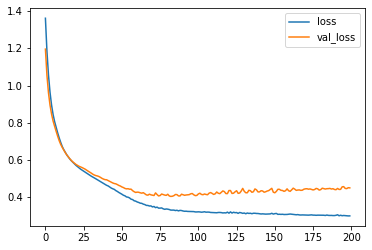

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
import numpy as np

rng = np.random.RandomState(0) # véletlen pontok generálása a tanítóadatok körül
Xnew = [-15,-15]+ [25, 25] * rng.rand(2000,2) 
ynew = model.predict(Xnew)

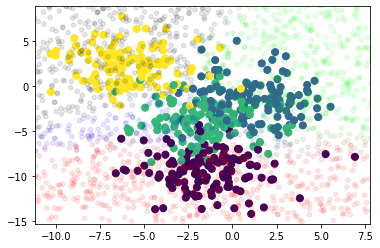

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50) #tanító adatok kirajzolása
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.1) # a teszt pontok kirajzolása
plt.axis(lim);

# Bevezetés 

Emlékezzünk vissza az előző feladat példájából, hogy a Keras megőrzi a képzési és validálási veszteség előzményeit a korszakok alatt, amikor a modellt képzi. Ebben a részben megtanuljuk, hogyan értelmezzük ezeket a tanulási görbéket, és hogyan használhatjuk fel őket a modellfejlesztés irányítására. Különösen a tanulási görbéket fogjuk megvizsgálni az *alulilleszkedés* és *túlilleszkedés* bizonyítékai szempontjából, és megnézünk néhány stratégiát ezek korrigálására.

# A tanulási görbék értelmezése 

A képzési adatokban lévő információkra kétféleképpen gondolhat: *jel* és *zaj*. A jel az a rész, amely általánosítható, az a rész, amely segíthet a modellünknek új adatokból előrejelzéseket készíteni. A zaj az a rész, amely *csak* a képzési adatokra igaz; a zaj az összes olyan véletlenszerű ingadozás, amely a valós világ adataiból származik, vagy az összes olyan véletlenszerű, nem informatív minta, amely valójában nem segíthet a modellnek előrejelzéseket készíteni. A zaj az a rész, amely hasznosnak tűnhet, de valójában nem az.

A modellt úgy képezzük ki, hogy olyan súlyokat vagy paramétereket választunk, amelyek minimalizálják a veszteséget egy képzési halmazon. Talán tudja, hogy ahhoz azonban, hogy pontosan értékelni tudjuk egy modell teljesítményét, ki kell értékelnünk azt egy új adathalmazon, a *validálási* adatokon.

Amikor egy modellt képezünk, a veszteséget korszakonként ábrázoljuk a gyakorlóhalmazon. Ehhez hozzáadjuk a validálási adatok ábrázolását is. Ezeket az ábrákat **tanulási görbéknek** nevezzük. A mélytanulási modellek hatékony képzése érdekében képesnek kell lennünk értelmezni őket.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/tHiVFnM.png" width="500" alt="A képzési és validációs veszteség grafikonja.">
<figcaption style="textalign: center; font-style: italic"><center>A validációs veszteség a nem látott adatokon várható hiba becslését adja meg.
</center></figcaption>
</figura>

Most a képzési veszteség vagy akkor csökken, amikor a modell jelet tanul, vagy amikor zajt tanul. A validációs veszteség azonban csak akkor fog csökkenni, ha a modell jelet tanul. (Bármilyen zajt is tanult meg a modell a gyakorlóhalmazból, az nem fog általánosítani az új adatokra). Tehát amikor a modell jelet tanul, mindkét görbe csökken, de amikor zajt tanul, a görbék között *hézag* keletkezik. A rés nagysága mutatja meg, hogy a modell mennyi zajt tanult meg.

Ideális esetben olyan modelleket hoznánk létre, amelyek megtanulják az összes jelet, és nem tanulják meg a zajt. Ez gyakorlatilag soha nem fog megvalósulni. Ehelyett egyfajta kereskedést folytatunk. Rávehetjük a modellt, hogy több jelet tanuljon meg a több zaj megtanulásának árán. Mindaddig, amíg a kereskedés a javunkra válik, a validációs veszteség tovább csökken. Egy bizonyos pont után azonban a kereskedés ellenünk fordulhat, a költség meghaladja a hasznot, és az érvényesítési veszteség emelkedni kezd.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eUF6mfo.png" width="600" alt="Two graphs. On the left, a line through a few data points with the true fit a parabola. On the right, a curve running through each datapoint with the true fit a parabola.">
<figcaption style="textalign: center; font-style: italic"><center>Underfitting and overfitting.
</center></figcaption>
</figure>

Ez a kompromisszum azt jelzi, hogy a modell képzése során két probléma merülhet fel: nem elegendő jel vagy túl sok zaj. A **alulilleszkedés** a gyakorlóhalmazban az, amikor a veszteség nem olyan alacsony, mint amilyen lehetne, mert a modell nem tanult elég *jelet*. **Túlillesztés** a gyakorlóhalmazon, amikor a veszteség nem olyan alacsony, mint lehetne, mert a modell túl sok *zajt* tanult. A mély tanulási modellek képzésének trükkje a kettő közötti legjobb egyensúly megtalálása.

Megnézünk néhány módszert arra, hogyan lehet több jelet kihozni a képzési adatokból, miközben csökkentjük a zaj mennyiségét.

# Kapacitás 

Egy modell **kapacitása** a tanulni képes minták méretére és összetettségére utal. A neurális hálózatok esetében ezt nagyrészt az határozza meg, hogy hány neuronja van, és ezek hogyan vannak összekapcsolva. Ha úgy tűnik, hogy a hálózat nem illeszkedik megfelelően az adatokhoz, akkor próbálja meg növelni a kapacitását.

A hálózat kapacitását növelheti úgy, hogy *szélesebbé* teszi (több egység a meglévő rétegekhez) vagy *mélyebbé* teszi (több réteg hozzáadásával). A szélesebb hálózatok könnyebben tanulnak lineárisabb összefüggéseket, míg a mélyebb hálózatok a nemlineárisabbakat részesítik előnyben. Hogy melyik a jobb, az csak az adathalmaztól függ.

```
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```


# Korai megállás 
Említettük, hogy ha egy modell túl buzgón tanulja a zajt, a validációs veszteség a képzés során elkezdhet növekedni. Ennek megelőzésére egyszerűen leállíthatjuk a képzést, amikor úgy tűnik, hogy a validációs veszteség már nem csökken. A képzés ilyen módon történő megszakítását **korai leállításnak** nevezzük.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eP0gppr.png" width=500 alt="A tanulási görbék grafikonja a korai leállással a minimális validációs veszteségnél, alulillesztéssel balra, túlillesztéssel jobbra.">.
<figcaption style="textalign: center; font-style: italic"><center>Megtartjuk a modellt ott, ahol a validációs veszteség minimális.
</center></figcaption>
</figura>

Amint észleljük, hogy a validációs veszteség emelkedni kezd, visszaállíthatjuk a súlyokat oda, ahol a minimum bekövetkezett. Ez biztosítja, hogy a modell ne tanuljon tovább zajt és ne illessze túl az adatokat.

A korai leállással történő képzés azt is jelenti, hogy kisebb a veszélye annak, hogy túl korán leállítjuk a képzést, mielőtt a hálózat befejezte volna a jelek tanulását. Tehát amellett, hogy a korai leállítás megakadályozza a túl hosszú képzésből adódó túlilleszkedést, a korai leállítás megakadályozhatja a nem elég hosszú képzésből adódó *alulilleszkedést* is. Csak állítsa be a képzési epochákat valamilyen nagy számra (többre, mint amennyire szüksége lesz), és a korai leállítás gondoskodik a többiről.

## Korai megállás hozzáadása 

A Kerasban a korai leállítást egy visszahíváson keresztül illesztjük be a képzésünkbe. A **callback** nem más, mint egy olyan függvény, amelyet a hálózat edzése közben időnként le akarunk futtatni. A korai leállítás visszahívás minden korszak után lefut. (A Kerasnak [számos hasznos callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) van előre definiálva, de [definiálhatunk sajátot is](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback).)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Ezek a paraméterek azt mondják: "Ha a validációs veszteség nem javult legalább 0,001-gyel az előző 20 korszakhoz képest, akkor állítsa le a képzést, és tartsa meg a legjobbnak talált modellt." Néha nehéz lehet megmondani, hogy a validációs veszteség a túlillesztés miatt emelkedik-e, vagy csak a véletlenszerű tételváltozások miatt. A paraméterek lehetővé teszik számunkra, hogy beállítsunk néhány megengedést arra vonatkozóan, hogy mikor álljunk le.

Ahogy a példánkban látni fogjuk, ezt a visszahívást a veszteséggel és az optimalizálóval együtt átadjuk a `fit` metódusnak.

# Példa - Modellképzés korai leállítással 

Folytassuk a modell fejlesztését a legutóbbi bemutató példájából. Növeljük a hálózat kapacitását, de a túlillesztés megelőzése érdekében hozzáadunk egy korai leállítás visszahívást is.

Itt van az adatelőkészítés újra.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

red_wine = pd.read_csv('red-wine.csv')

y = red_wine.quality #X,y beállítása
X = red_wine.drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # első felosztás train, teszt halmazokra

# Scale to [0, 1]
max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)
X_train = (X_train - min_) / (max_ - min_)
X_test = (X_test - min_) / (max_ - min_)

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Most növeljük a hálózat kapacitását. Elég nagy hálózatot választunk, de a visszahívásra támaszkodva leállítjuk a képzést, amint a validációs veszteség a növekedés jeleit mutatja.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Miután definiáltad a visszahívást, add hozzá argumentumként a `fit`-ben (több is lehet, ezért tedd egy listába). A korai leállítás használatakor válasszon nagy számú epochát, többet, mint amennyire szüksége lesz.

Minimum validation loss: 0.46485084295272827


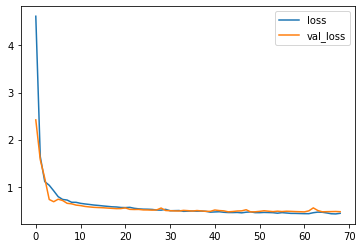

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

És valóban, a Keras jóval a teljes 500 korszak előtt leállította a tréninget!



In [ ]:
model.predict([[0.362832,0.349315,0.234,0.3456,0.123,0.112551,1,1,1,1,1]])

array([[6.69974]], dtype=float32)

# Bevezetés 

A mélytanulás világa több, mint sűrű rétegek. Több tucatnyi fajta réteget adhatsz hozzá egy modellhez. (Próbáld meg átböngészni a [Keras docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/) című dokumentumot egy példáért!) Egyesek olyanok, mint a sűrű rétegek, és neuronok közötti kapcsolatokat határoznak meg, mások pedig előfeldolgozást vagy másfajta transzformációkat végezhetnek.

Ebben a részben kétféle speciális réteget ismerünk meg, amelyek maguk nem tartalmaznak neuronokat, de olyan funkciókat adnak hozzá, amelyek néha különböző módon előnyösek lehetnek egy modell számára. Mindkettőt gyakran használják a modern architektúrákban.

# Dropout 

Ezek közül az első a "kieső réteg", amely segíthet a túlillesztés korrigálásában.

Az előző részben beszéltünk arról, hogy a túlilleszkedést az okozza, hogy a hálózat hamis mintákat tanul a képzési adatokban. Ezeknek a hamis mintázatoknak a felismeréséhez a hálózat gyakran nagyon speciális súlykombinációkra, a súlyok egyfajta "összefonódásokra" támaszkodik.
A teljesen összekapcsolt réteg a paraméterek nagy részét lefoglalja, ezért a neuronok a képzés során egymás között társfüggőséget alakítanak ki, ami az egyes neuronok egyéni teljesítményét visszafogja, ami a képzési adatok túlzott illeszkedéséhez vezet. Mivel ilyen specifikusak, általában törékenyek: ha egyet eltávolítunk, az összefonódás szétesik.

Ez az ötlet áll a **dropout** mögött. Az ilyen összeesküvések felbontására a képzés minden lépésénél véletlenszerűen *kiesik* a réteg bemeneti egységeinek egy töredéke, így a hálózat sokkal nehezebben tanulja meg ezeket a hamis mintákat a képzési adatokban. Ehelyett széleskörű, általános mintákat kell keresnie, amelyek súlymintái általában robusztusabbak.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/a86utxY.gif" width="600" alt="An animation of a network cycling through various random dropout configurations.">
<figcaption style="textalign: center; font-style: italic"><center>Here, 50% dropout has been added between the two hidden layers.</center></figcaption>
</figure>

Úgy is gondolhatsz a kiesésre, mint a hálózatok egyfajta *együttesének* létrehozására. A jóslatokat már nem egy nagy hálózat, hanem kisebb hálózatok bizottsága fogja elkészíteni. A bizottságban lévő egyének hajlamosak különböző hibákat elkövetni, de ugyanakkor igazuk is lesz, így a bizottság egésze jobb lesz, mint bármelyik egyén. (Ha ismeri a véletlen erdőket, mint döntési fák együttesét, akkor ez ugyanez az elképzelés).

## Kiesés hozzáadása 

A Kerasban a kiesési arány argumentum `rate` határozza meg, hogy a bemeneti egységek hány százalékát kell kikapcsolni. A `Dropout` réteget közvetlenül a réteg elé tesszük, amelyre a kiesést alkalmazni szeretnénk:

```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```

# Batch normalizálás 

A következő speciális réteg, amelyet megnézünk, a "kötegelt normalizálást" (vagy "batchnorm") végzi, amely segíthet a lassú vagy instabil képzés korrigálásában.

A kötegelt normalizálás olyan transzformációt alkalmaz, amely az átlagos kimenetet 0 közelében tartja, a kimeneti szórást pedig 1 közelében tartja.

A neurális hálózatoknál általában jó ötlet az összes adatot közös skálára helyezni, talán valami olyasmivel, mint a scikit-learn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) vagy [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Ennek oka az, hogy az SGD a hálózati súlyokat annak arányában fogja eltolni, hogy az adatok mekkora aktiválást eredményeznek. Az olyan jellemzők, amelyek hajlamosak nagyon eltérő méretű aktivációkat produkálni, instabil képzési viselkedést eredményezhetnek.

Nos, ha jó, ha az adatokat normalizáljuk, mielőtt a hálózatba kerülnek, talán a hálózaton belüli normalizálás is jobb lenne! Valójában van egy speciális rétegünk, amely képes erre, a **batch normalizációs réteg**. A tétel normalizáló réteg minden egyes tételt megvizsgál, amikor beérkezik, először normalizálja a tételt a saját átlagával és szórásával, majd az adatokat egy új skálára is helyezi két betanítható átskálázási paraméterrel. A Batchnorm valójában egyfajta koordinált átskálázást végez a bemenetein.

A batchnormot leggyakrabban az optimalizálási folyamat segédeszközeként adják hozzá (bár néha az előrejelzési teljesítményt is segítheti). A batchnormával rendelkező modelleknek általában kevesebb korszakra van szükségük a képzés befejezéséhez. Ezenkívül a batchnorm különböző olyan problémákat is orvosolhat, amelyek miatt a képzés "elakadhat". Fontolja meg a batchnormálás hozzáadását a modelljeihez, különösen akkor, ha a képzés során problémák merülnek fel.

## Batch normalizálás hozzáadása 

Úgy tűnik, hogy a kötegelt normalizálás a hálózat szinte bármely pontján használható. Elhelyezhetjük egy réteg után...

```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

... vagy egy réteg és annak aktiváló függvénye között:

```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

Ha pedig a hálózatod első rétegeként adod hozzá, akkor egyfajta adaptív előfeldolgozóként működhet, és helyettesítheti például a Sci-Kit Learn "StandardScaler"-jét.

# Példa - Kiesés és kötegelt normalizálás használata 

Folytassuk a *Red Wine* modell fejlesztését. Most még tovább növeljük a kapacitást, de hozzáadunk dropoutot a túlillesztés ellenőrzésére és batch normalizálást az optimalizálás felgyorsítására. Ezúttal az adatok szabványosítását is elhagyjuk, hogy bemutassuk, hogyan stabilizálhatja a kötegelt normalizálás a képzést.

A dropout hozzáadásakor előfordulhat, hogy növelnie kell a "Dense" rétegek egységszámát.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                   
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

Ezúttal nem kell változtatni a képzés felépítésén.

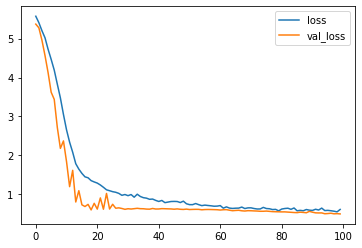

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Jellemzően jobb teljesítményt érhet el, ha az adatokat szabványosítja, mielőtt a képzéshez használná őket. Az azonban, hogy egyáltalán fel tudtuk használni a nyers adatokat, azt mutatja, hogy a kötegelt normalizálás mennyire hatékony lehet a nehezebb adathalmazokon.


# Bináris osztályozás

A kurzus eddigi részében arról tanultunk, hogy a neurális hálózatok hogyan oldanak meg regressziós problémákat. Most a neurális hálózatokat egy másik gyakori gépi tanulási problémára fogjuk alkalmazni: az osztályozásra. Az eddig tanultak nagy része továbbra is érvényes. A fő különbség a veszteségfüggvényben van, amelyet használunk, és abban, hogy milyen kimeneteket szeretnénk, ha az utolsó réteg produkálna.


A két osztály valamelyikébe történő osztályozás gyakori gépi tanulási probléma. Megjósolhatjuk, hogy egy vásárló valószínűleg vásárol-e vagy sem, hogy egy hitelkártya-tranzakció csalárd volt-e vagy sem, hogy a mélyűri jelek egy új bolygóra utaló jeleket mutatnak-e, vagy egy orvosi teszt egy betegségre utaló bizonyítékot. Ezek mind **bináris osztályozási** problémák.

A nyers adatokban az osztályokat olyan karakterláncok képviselhetik, mint az "Igen" és a "Nem", vagy a "Kutya" és a "Macska". Az adatok felhasználása előtt hozzárendelünk egy **osztálycímkét**: az egyik osztály "0", a másik "1" lesz. A numerikus címkék hozzárendelése az adatokat olyan formába hozza, amelyet a neurális hálózat fel tud használni.

# Pontosság és kereszt-entrópia 

A **pontosság** az egyik a sok mérőszám közül, amelyet egy osztályozási probléma sikerének mérésére használnak. A pontosság a helyes előrejelzések aránya az összes előrejelzéshez képest: `Pontosság = number_correct / total`. Egy olyan modell, amely mindig helyesen jósol, pontossági értéke `1,0` lenne. Ha minden más tényező egyenlő, a pontosság ésszerű mérőszám, ha az adathalmazban az osztályok nagyjából azonos gyakorisággal fordulnak elő.

A pontossággal (és a legtöbb más osztályozási metrikával) az a probléma, hogy nem használható veszteségfüggvényként. Az SGD-nek olyan veszteségfüggvényre van szüksége, amely egyenletesen változik, de a pontosság, mivel a számok aránya, "ugrásszerűen" változik. Ezért egy helyettesítő függvényt kell választanunk, amely a veszteségfüggvény szerepét tölti be. Ez a helyettesítő a *kereszt-entrópia* függvény.

Emlékezzünk vissza, hogy a veszteségfüggvény határozza meg a hálózat *célját* a képzés során. A regresszióval a célunk az volt, hogy minimalizáljuk a távolságot a várható eredmény és a megjósolt eredmény között. Ennek a távolságnak a mérésére a MAE-t választottuk.

Osztályozás esetén ehelyett a *valószínűségek* közötti távolságot szeretnénk, és ezt a kereszt-entrópia biztosítja. A **kereszt-entrópia** egyfajta mérték az egyik valószínűségi eloszlás és a másik közötti távolságra.




<figure style="padding: 1em;">
<img src="https://i.imgur.com/DwVV9bR.png" width="400" alt="Graphs of accuracy and cross-entropy.">
<figcaption style="textalign: center; font-style: italic"><center>Cross-entropy penalizes incorrect probability predictions.</center></figcaption>
</figure>

Az elképzelés az, hogy azt szeretnénk, ha a hálózatunk a helyes osztályt 1,0 valószínűséggel jósolná meg. Minél távolabb van a megjósolt valószínűség az `1.0-tól`, annál nagyobb lesz a kereszt-entrópia veszteség.

A kereszt-entrópia használatának technikai okai kissé bonyolultak, de a legfontosabb dolog, amit ebből a szakaszból érdemes leszűrni, a következő: használjuk a kereszt-entrópiát osztályozási veszteségként; más mérőszámok, amelyek fontosak lehetnek (mint például a pontosság), ezzel együtt javulni fognak.

# Valószínűségek készítése a szigmoid függvénnyel 

A kereszt-entrópia és a pontosság függvények egyaránt valószínűségeket igényelnek bemenetként, azaz 0 és 1 közötti számokat. Ahhoz, hogy a sűrű réteg által előállított valós értékű kimeneteket valószínűséggé alakítsuk, egy újfajta aktiválási függvényt csatolunk, a **szigmoid aktiválást**.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/FYbRvJo.png" width="400" alt="The sigmoid graph is an 'S' shape with horizontal asymptotes at 0 to the left and 1 to the right. ">
<figcaption style="textalign: center; font-style: italic"><center>The sigmoid function maps real numbers into the interval $[0, 1]$.</center></figcaption>
</figure>

A végső osztály-előrejelzéshez definiálunk egy *küszöbérték* valószínűséget. Ez általában 0,5, így a kerekítéssel megkapjuk a helyes osztályt: a 0,5 alatti érték a 0 címkével jelölt osztályt jelenti, a 0,5 vagy a feletti érték pedig az 1 címkével jelölt osztályt. A 0,5-es küszöbérték az, amit a Keras alapértelmezés szerint használ a [pontossági metrikával] (https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy).


#Házi Feladat

A fentiekben gyakorolt borminősítéses feladatot alakítsuk át osztályozási feladattá, azaz y-t one hot encodingal alakítsuk át és a hozzátartozó modellt is ennek megfelelően alakítsuk át.
Legyen 3 rejtett réteg rétegenként 1024 neuronnal, 30%-os dropouttal, korai megállással. A metrika legyen a pontosság! Értékeljük ki a loss-okat!